# Training and Visualizing a Decision Tree


In [47]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt


from graphviz import Source


In [48]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [49]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

wine = datasets.load_wine()
X = wine.data[:, 11:] # petal length and width
y = wine.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

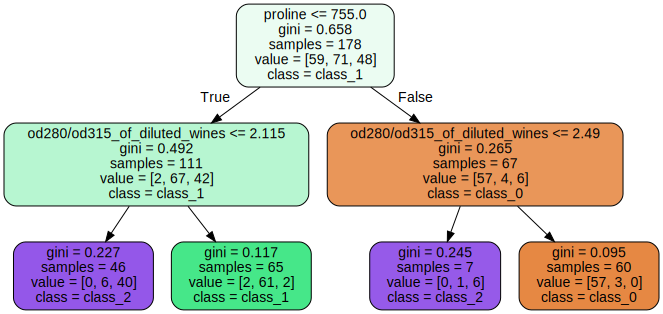

In [50]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="wine_tree.dot",
    feature_names=wine.feature_names[11:],
    class_names=wine.target_names,
    rounded=True,
    filled=True
)
Source.from_file(os.path.join("wine_tree.dot"))

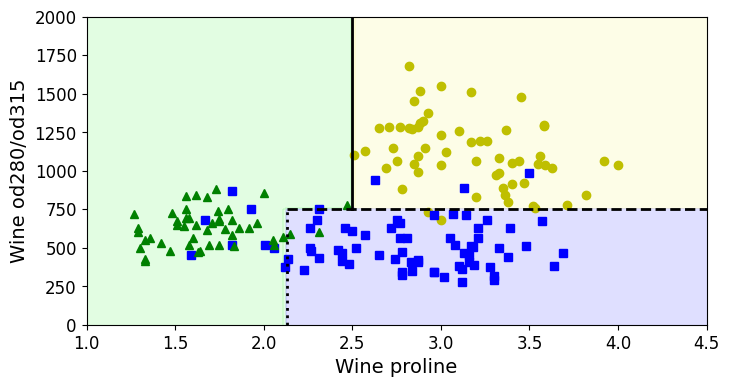

In [51]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[1, 4.5, 0, 2000], wine=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not wine:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Wine class_0")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Wine class_1")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Wine class_2")
        plt.axis(axes)
    if wine:
        plt.xlabel("Wine proline", fontsize=14)
        plt.ylabel("Wine od280/od315", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.5, 2.5], [750, 2000], "k-", linewidth=2)
plt.plot([2.13, 4.5], [750, 750], "k--", linewidth=2)
plt.plot([2.13, 2.13], [0, 750], "k:", linewidth=2)

plt.show()

### Estimating Class Probabilities

In [57]:
tree_clf.predict_proba([[1, 800]])

array([[0.        , 0.14285714, 0.85714286]])

In [58]:
tree_clf.predict([[1, 800]])

array([2])

### Regression

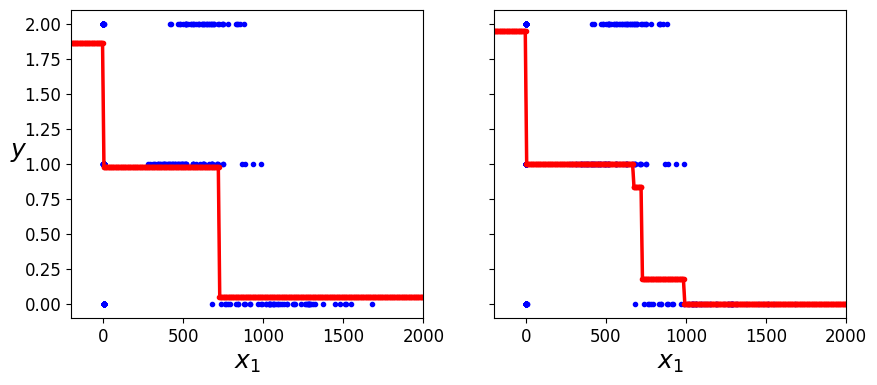

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[-200, 2000,-0.1, 2.1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(250, 2)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])

plot_regression_predictions(tree_reg1, X, y)
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)

plt.show()

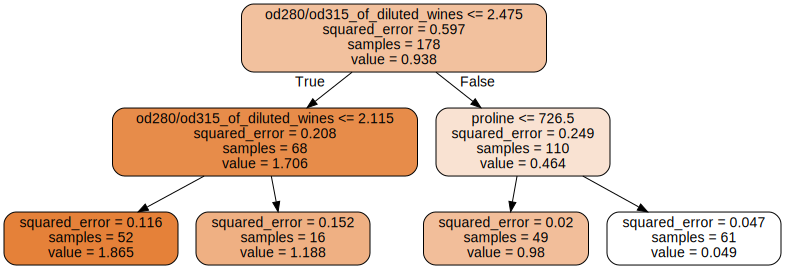

In [55]:
export_graphviz(
    tree_reg1,
    out_file=os.path.join("wine_tree_reg.dot"),
    feature_names=wine.feature_names[11:],
    class_names=wine.target_names,
    rounded=True,
    filled=True
)
Source.from_file(os.path.join("wine_tree_reg.dot"))

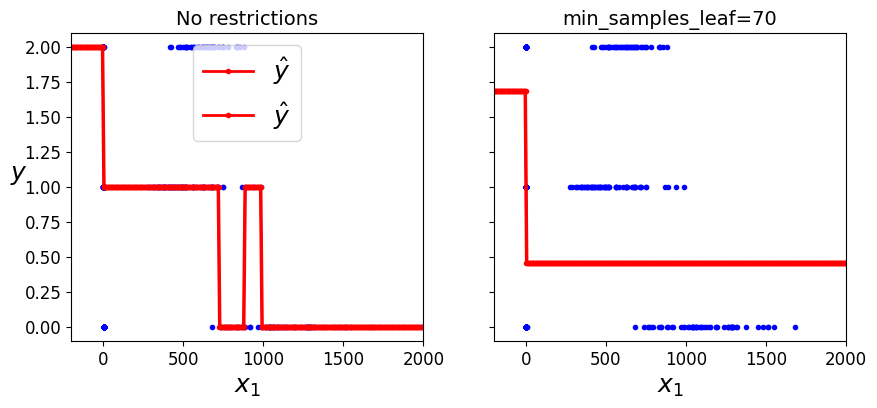

In [56]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=70)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(-200, 2000, 500).reshape(250, 2)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-200, 2000, -0.1, 2.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-200, 2000, -0.1, 2.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()